  Using cached ultralytics-8.3.80-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached ultralytics-8.3.80-py3-none-any.whl (921 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cuda_nvrtc_cu12-12.4.1

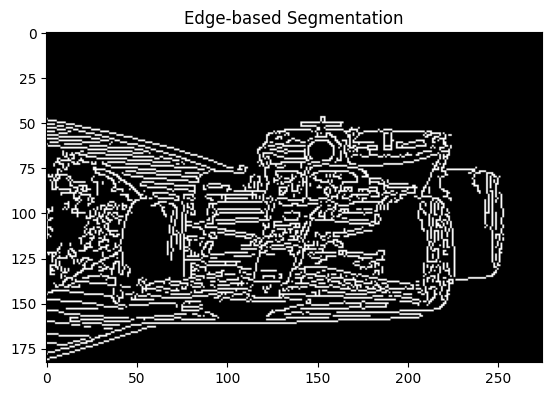

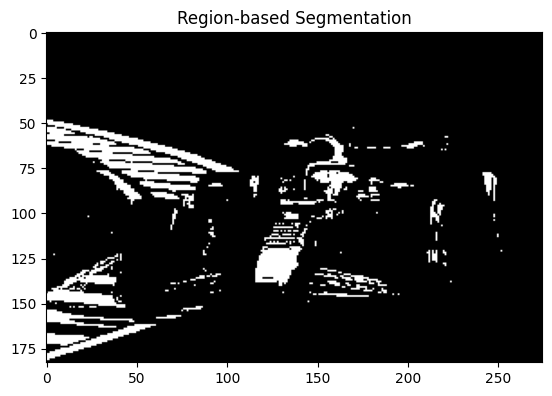

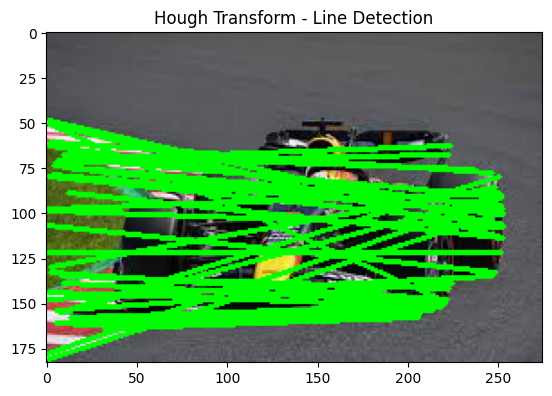

100%|██████████| 6.25M/6.25M [00:00<00:00, 52.6MB/s]



image 1/1 /content/images.jpeg: 448x640 1 train, 1 boat, 264.6ms
Speed: 8.8ms preprocess, 264.6ms inference, 20.2ms postprocess per image at shape (1, 3, 448, 640)


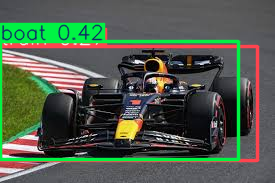

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
Extracted Features Shape: (1, 7, 7, 512)


In [2]:
!pip install ultralytics
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Task 1: Image Segmentation and Hough Transform
def edge_based_segmentation(image_path):
    # Check if the image file exists and can be read
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image loading was successful
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path.")
        return  # Exit the function if image loading failed

    edges = cv2.Canny(image, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge-based Segmentation')
    plt.show()

def region_based_segmentation(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title('Region-based Segmentation')
    plt.show()

def hough_transform(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Hough Transform - Line Detection')
    plt.show()

# Task 2: Object Detection

def object_detection_yolo(image_path):
    model = YOLO('yolov8n.pt')
    results = model(image_path)
    if results and results[0] is not None:
        results[0].show()
    else:
        print("No objects detected in the image.")

def rcnn_object_detection(image_path):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.output)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    features = model.predict(image)
    print('Extracted Features Shape:', features.shape)

# Example usage
edge_based_segmentation('/content/images.jpeg')
region_based_segmentation('/content/images.jpeg')
hough_transform('/content/images.jpeg')
object_detection_yolo('/content/images.jpeg')
rcnn_object_detection('/content/images.jpeg')
